**Load the data**

In [11]:
import pandas as pd

df = pd.read_csv("../data/ai_assistant_usage_student_life.csv")
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


**Check for nulls, data types**

In [12]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000,10000,10000.000000
unique,10000,3,7,366,NaN,NaN,6,NaN,4,2,NaN
top,SESSION10000,Undergraduate,Biology,2025-01-19,NaN,NaN,Writing,NaN,Assignment Completed,True,NaN
freq,1,5978,1458,41,NaN,NaN,3101,NaN,4768,7064,NaN
mean,NaN,NaN,NaN,NaN,19.846467,5.607500,NaN,3.479500,NaN,NaN,3.417780
std,NaN,NaN,NaN,NaN,13.897302,4.648764,NaN,0.991805,NaN,NaN,1.143331
min,NaN,NaN,NaN,NaN,0.030000,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,9.630000,2.000000,NaN,3.000000,NaN,NaN,2.600000
50%,NaN,NaN,NaN,NaN,16.650000,4.000000,NaN,4.000000,NaN,NaN,3.500000
75%,NaN,NaN,NaN,NaN,26.670000,8.000000,NaN,4.000000,NaN,NaN,4.400000


In [13]:
df.drop(['SessionID','SessionDate'], axis=1, inplace=True)

In [14]:
df.head()

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,Undergraduate,Computer Science,31.20,11,Studying,2,Assignment Completed,True,1.0
1,Undergraduate,Psychology,13.09,6,Studying,3,Assignment Completed,True,2.0
2,Undergraduate,Business,19.22,5,Coding,3,Assignment Completed,True,3.3
3,Undergraduate,Computer Science,3.70,1,Coding,3,Assignment Completed,True,3.5
4,Undergraduate,Psychology,28.12,9,Writing,3,Assignment Completed,True,2.9


<Axes: >

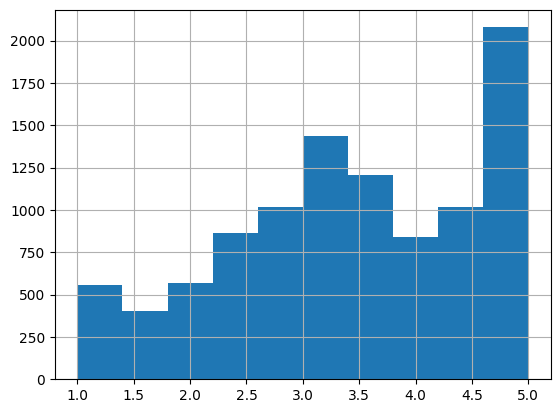

In [15]:
df['SatisfactionRating'].hist()

**Encoding categoricals**

In [16]:
categorical_cols = ['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [17]:
print(df.columns.tolist())

['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'UsedAgain', 'SatisfactionRating', 'StudentLevel_High School', 'StudentLevel_Undergraduate', 'Discipline_Business', 'Discipline_Computer Science', 'Discipline_Engineering', 'Discipline_History', 'Discipline_Math', 'Discipline_Psychology', 'TaskType_Coding', 'TaskType_Homework Help', 'TaskType_Research', 'TaskType_Studying', 'TaskType_Writing', 'FinalOutcome_Confused', 'FinalOutcome_Gave Up', 'FinalOutcome_Idea Drafted']


In [23]:
df = df.astype({col: int for col in df.select_dtypes(bool).columns})
df.head(3)

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,UsedAgain,SatisfactionRating,StudentLevel_High School,StudentLevel_Undergraduate,Discipline_Business,Discipline_Computer Science,Discipline_Engineering,...,Discipline_Math,Discipline_Psychology,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,FinalOutcome_Confused,FinalOutcome_Gave Up,FinalOutcome_Idea Drafted
0,31.20,11,2,1,1.0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,13.09,6,3,1,2.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,19.22,5,3,1,3.3,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(['SatisfactionRating'], axis=1)
y = df['SatisfactionRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X.head(2)

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,UsedAgain,StudentLevel_High School,StudentLevel_Undergraduate,Discipline_Business,Discipline_Computer Science,Discipline_Engineering,Discipline_History,Discipline_Math,Discipline_Psychology,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,FinalOutcome_Confused,FinalOutcome_Gave Up,FinalOutcome_Idea Drafted
0,31.20,11,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,13.09,6,3,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [26]:
import joblib

joblib.dump((X_train, X_test, y_train, y_test), '../data/train_test_split.pkl')

['../data/train_test_split.pkl']